# Multiple Linear Regression- Housing dataset

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [2]:
ds=pd.read_csv('Housing.csv')

In [3]:
ds.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
ds.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# plot for our dataset (experiment number 1)

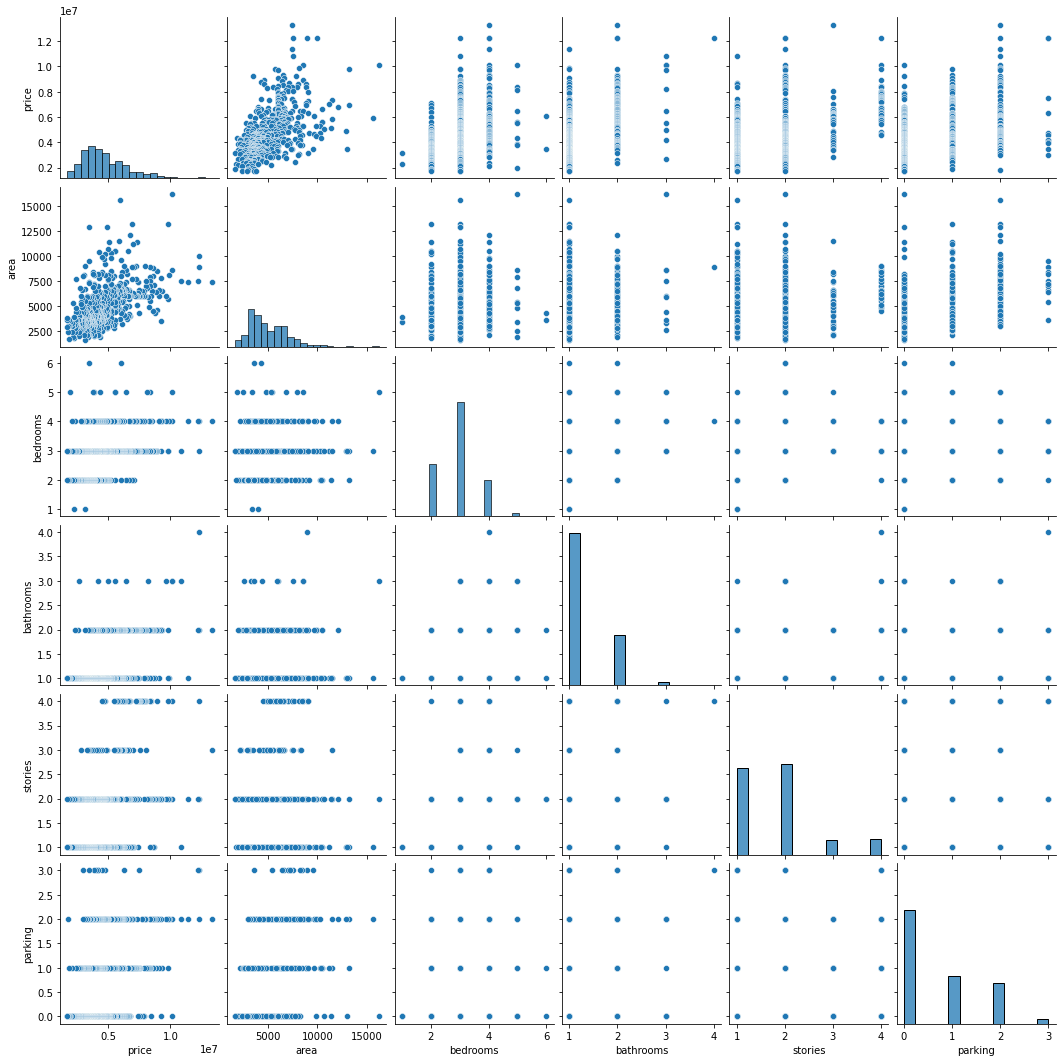

In [5]:
sns.pairplot(ds)

In [6]:
corr_matrix = ds.corr()
print(corr_matrix)

              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000


<AxesSubplot:>

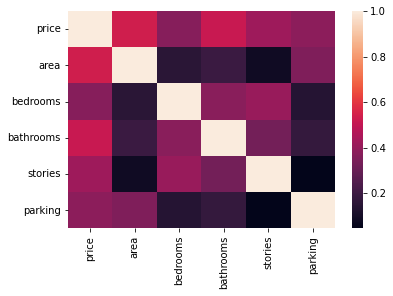

In [7]:
sns.heatmap(corr_matrix)

### Split the dataset into independent and Dependent variables

In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
X=ds[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']]
y=ds[['price']]

In [10]:
ds.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

### Work with the catagorical data

In [11]:
ds['mainroad'].value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [12]:
ds['guestroom'].value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

In [13]:
ds['basement'].value_counts()

no     354
yes    191
Name: basement, dtype: int64

In [14]:
ds['hotwaterheating'].value_counts()

no     520
yes     25
Name: hotwaterheating, dtype: int64

In [15]:
ds['airconditioning'].value_counts()

no     373
yes    172
Name: airconditioning, dtype: int64

In [16]:
ds['prefarea'].value_counts()

no     417
yes    128
Name: prefarea, dtype: int64

In [17]:
ds['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

# Turning categorical columns into 1 or 0 with dummies

In [18]:
X=pd.get_dummies(ds[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']],
                drop_first=True)

In [19]:
X.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,7420,4,1,2,2,1,1,1,0,1,0,0,0


## Splitting the dataset into the Training set and Test set


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_rest, y_train, y_rest= train_test_split(X,y,
                                                  test_size=.1, random_state=20)
                                               

In [21]:
X_test, X_val, y_test, y_val=train_test_split(X_rest,y_rest,
                                                  test_size=.1, random_state=20)
                                                  

## Training the Multiple Linear Regression model on the Training set

In [22]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train.values, y_train)

LinearRegression()

## Intercept and Coefficient

In [23]:
print('The coefficients are:', regressor.coef_)
print('The intercept is:', regressor.intercept_)

The coefficients are: [[ 2.48445255e+02  1.32015678e+05  9.88972986e+05  4.33817126e+05
   2.91011373e+05  4.02594956e+05  3.44929362e+05  2.99713946e+05
   6.59976914e+05  8.11033778e+05  6.85985176e+05 -2.66859853e+04
  -3.96630876e+05]]
The intercept is: [16465.06806519]


In [24]:
X_train.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes',
       'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

# RMSE and R square

In [25]:
y_pred=regressor.predict(X_test.values)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
import math
print(f'The r-square is {r2_score(y_test, y_pred): .2f}')
print(f'The RMSE is {math.sqrt(mean_squared_error(y_test, y_pred)): .2f}')

The r-square is  0.72
The RMSE is  994996.85


# Validation case scenario:
### House with 
### area = 7420
### bedrooms = 4
### bathroom= 2
### stories = 3
### On a mainroad
### no guestroom
### no basement 
### no hotwater
### has air conditioning
### 2 parking
### yes prefarea
### it is furnished

# actual = 13,300,000


In [27]:
regressor.predict([[7420,4,2,3,2,1,0,0,0,1,1,0,0]])

array([[8149025.5785844]])

# my predicted result with 80/10/10 for train, validate, and test and a raw dataset

In [50]:
# 8149025.5785844

# stacking some values for pred and actual

In [29]:
y_predval=regressor.predict(X_val.values)
y_validate=y_val.to_numpy()
np.hstack((y_predval, y_validate))

array([[7194035.97962154, 5873000.        ],
       [7381875.46337198, 8400000.        ],
       [5260025.41954115, 8750000.        ],
       [3723179.56283568, 4270000.        ],
       [2283045.51154743, 3255000.        ],
       [4052286.8043545 , 3080000.        ]])

In [30]:
X_test.head(5)

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
513,4400,3,1,2,0,1,0,0,0,0,0,0,1
254,4510,4,1,2,2,1,0,0,0,1,0,1,0
418,3500,4,1,2,2,1,0,0,0,1,0,0,1
16,6600,4,2,2,1,1,1,1,0,1,1,0,1
267,4920,3,1,2,1,1,0,0,0,0,0,1,0


# Normalizing the data to contain a smaller spread of prices. This set will only show entries where there is no preferred area (prefarea) 
# Experiment number 2

In [31]:
new_ds = ds[ds['prefarea'] != 'yes']

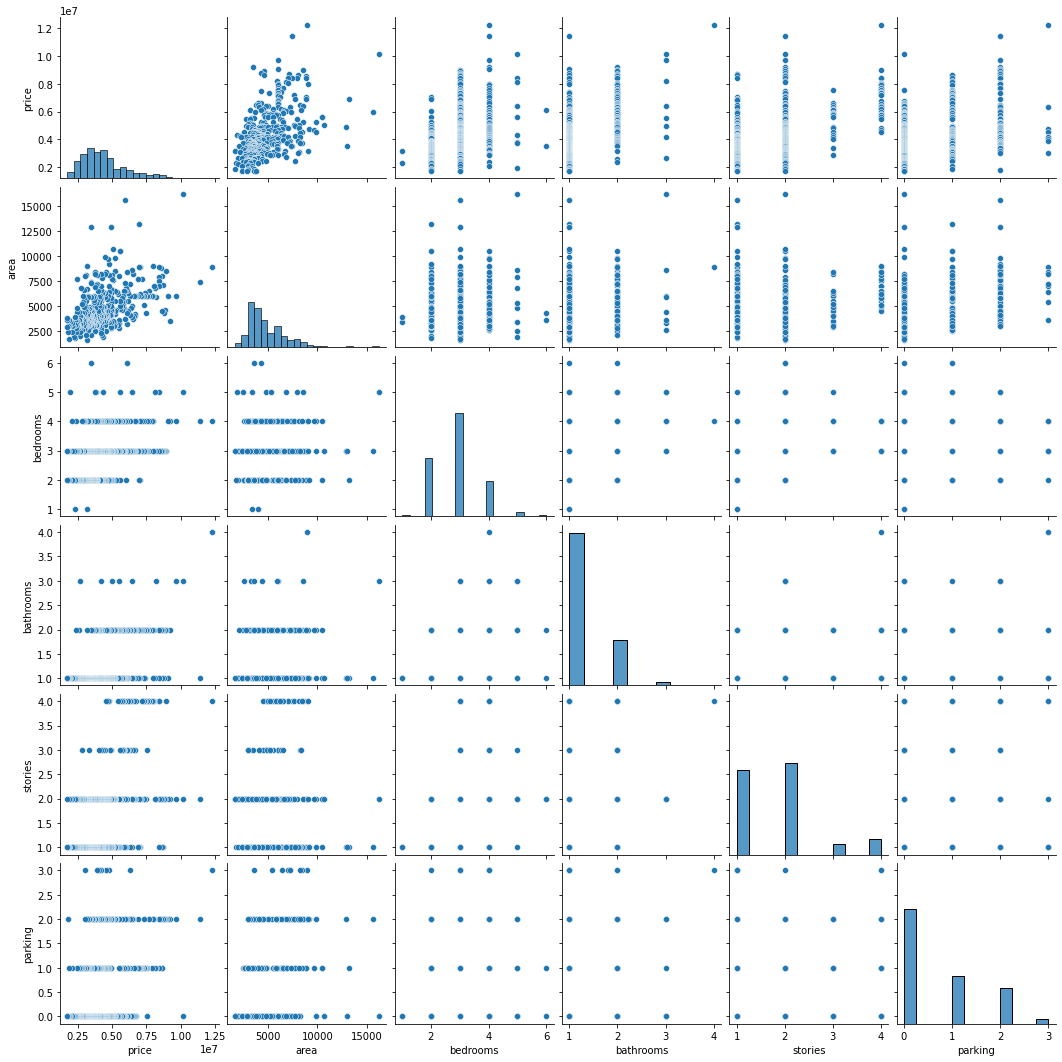

In [32]:
sns.pairplot(new_ds)

In [33]:
corr_matrix = new_ds.corr()
print(corr_matrix)


              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.491259  0.361712   0.517225  0.483447  0.385977
area       0.491259  1.000000  0.145326   0.196560  0.119140  0.304094
bedrooms   0.361712  0.145326  1.000000   0.361541  0.476191  0.129084
bathrooms  0.517225  0.196560  0.361541   1.000000  0.349467  0.224008
stories    0.483447  0.119140  0.476191   0.349467  1.000000  0.095062
parking    0.385977  0.304094  0.129084   0.224008  0.095062  1.000000


<AxesSubplot:>

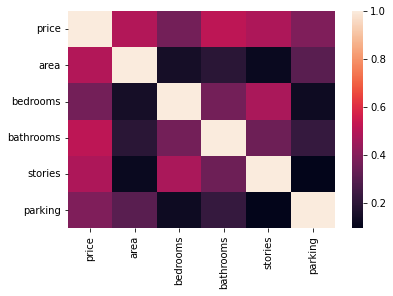

In [34]:
sns.heatmap(corr_matrix)

# splitting dataset into independent and dependent variables and getting dummies

In [35]:
X2=new_ds[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']]
y2=new_ds[['price']]

In [36]:
X2=pd.get_dummies(new_ds[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']],
                drop_first=True)

In [37]:
X2.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
1,8960,4,4,4,3,1,0,0,0,1,0,0
4,7420,4,1,2,2,1,1,1,0,1,0,0
7,16200,5,3,2,0,1,0,0,0,0,0,1
11,6000,4,3,2,2,1,1,1,1,0,1,0
13,3500,4,2,2,2,1,0,0,1,0,0,0


## Splitting the dataset into the Training set and Test set

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_rest, y_train, y_rest= train_test_split(X2,y2,
                                                  test_size=.1,
                                                  random_state=20)

In [39]:
X_test, X_val, y_test, y_val=train_test_split(X_rest,y_rest,
                                                  test_size=.1,
                                             random_state=20)
                                                  

## training the model

In [40]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train.values, y_train)

LinearRegression()

In [41]:
y_pred=regressor.predict(X_test.values)

# r square and rmse for new ds

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
import math
print(f'The r-square is {r2_score(y_test, y_pred): .2f}')
print(f'The RMSE is {math.sqrt(mean_squared_error(y_test, y_pred)): .2f}')

The r-square is  0.61
The RMSE is  1173809.36


# testcast for 80/10/10 split for new_ds

## area 8960
## 4 bedrooms
## 4 bathrooms
## 4 stories
## 3 parking spots
## on a mainroad
## no guestroom
## no basement
## no hotwater
## yes air condition
## no prefarea
## furnished


# actual is 12250000


In [43]:
new_ds.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
11,9681000,6000,4,3,2,yes,yes,yes,yes,no,2,no,semi-furnished
13,9240000,3500,4,2,2,yes,no,no,yes,no,2,no,furnished


In [44]:
# my predicted value

In [45]:
regressor.predict([[8950,4,4,4,3,1,0,0,0,1,0,0]])

array([[9794981.24731789]])

## predicted was 9794981.24731789

In [46]:
X2.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
1,8960,4,4,4,3,1,0,0,0,1,0,0
4,7420,4,1,2,2,1,1,1,0,1,0,0
7,16200,5,3,2,0,1,0,0,0,0,0,1
11,6000,4,3,2,2,1,1,1,1,0,1,0
13,3500,4,2,2,2,1,0,0,1,0,0,0


In [47]:
y_predval=regressor.predict(X_val.values)

In [48]:
y_validate=y_val.to_numpy()

# stacking some predicted with actual values

In [49]:
np.hstack((y_predval, y_validate))

array([[5013664.46245602, 5600000.        ],
       [4526468.35962998, 3290000.        ],
       [3023165.39185682, 4865000.        ],
       [4289702.09273875, 4025000.        ],
       [6492951.42470081, 8890000.        ]])